In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [33]:
df_banknote = pd.read_csv('data_coursera.csv')

In [34]:
df_banknote.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [35]:
df_banknote.sample(15)

,V1,V2
1251,-0.776880,0.13036
846,-2.140500,-0.16762
8,3.203200,5.75880
93,2.448600,-6.31750
316,5.735300,5.28080
896,0.004055,0.62905
313,2.127400,5.19390
415,3.802300,-3.86960
989,-6.752600,8.81720
278,0.895660,7.77630


In [36]:
df_banknote_statistical = pd.DataFrame({
    'Mean' : df_banknote[['V1', 'V2']].mean(),
    'STD' : df_banknote[['V1', 'V2']].std(),
    'Min' : df_banknote[['V1', 'V2']].min(),
    '25%' : df_banknote[['V1', 'V2']].quantile(0.25),
    'Median' : df_banknote[['V1', 'V2']].median(),
    '75%' : df_banknote[['V1', 'V2']].quantile(0.75),
    'Max' : df_banknote[['V1', 'V2']].max()
})

df_banknote_statistical

,Mean,STD,Min,25%,Median,75%,Max
V1,0.433735,2.842763,-7.0421,-1.7730,0.49618,2.821475,6.8248
V2,1.922353,5.869047,-13.7731,-1.7082,2.31965,6.814625,12.9516


In [37]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_banknote[['V1', 'V2']])

df_banknote_scaled = pd.DataFrame(scaled_data, columns=['V1', 'V2'])

df_banknote_scaled.sample(10)

,V1,V2
751,0.640760,1.052828
785,-0.738965,-0.378803
1105,-0.740513,-0.683896
782,-0.275127,-0.393617
845,-1.518913,0.507192
389,1.183951,1.448914
860,-1.370377,0.130861
437,0.037922,0.700462
1290,-0.113809,0.008820
242,0.424694,0.277224


C:\Users\syafo\AppData\Local\Temp\ipykernel_19908\1015653295.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], alpha=0.25, cmap='viridis')


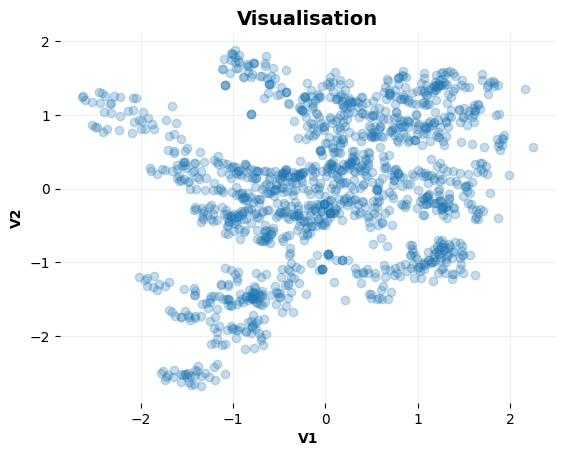

In [38]:
plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], alpha=0.25, cmap='viridis')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Visualisation', fontsize=14, fontweight='semibold')
plt.box(None)
plt.grid(alpha=0.2)
plt.xlabel('V1', fontweight='semibold')
plt.ylabel('V2', fontweight='semibold')
plt.show()


---

### KMeans

In [39]:
kmeans = KMeans(n_clusters=2, random_state=0)
df_banknote_scaled['cluster'] = kmeans.fit_predict(df_banknote_scaled)

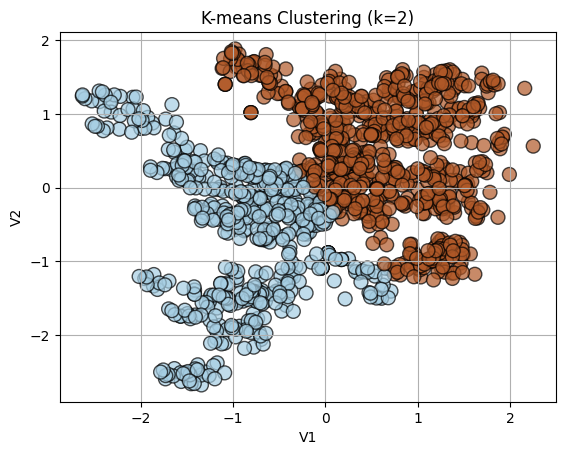

In [47]:
# Plot clusters
plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], c=df_banknote_scaled['cluster'], cmap='Paired', s=100, edgecolors='k', alpha=0.7)
plt.title("K-means Clustering (k=2)")
plt.xlabel("V1")
plt.ylabel("V2")
plt.grid(True)
plt.show()


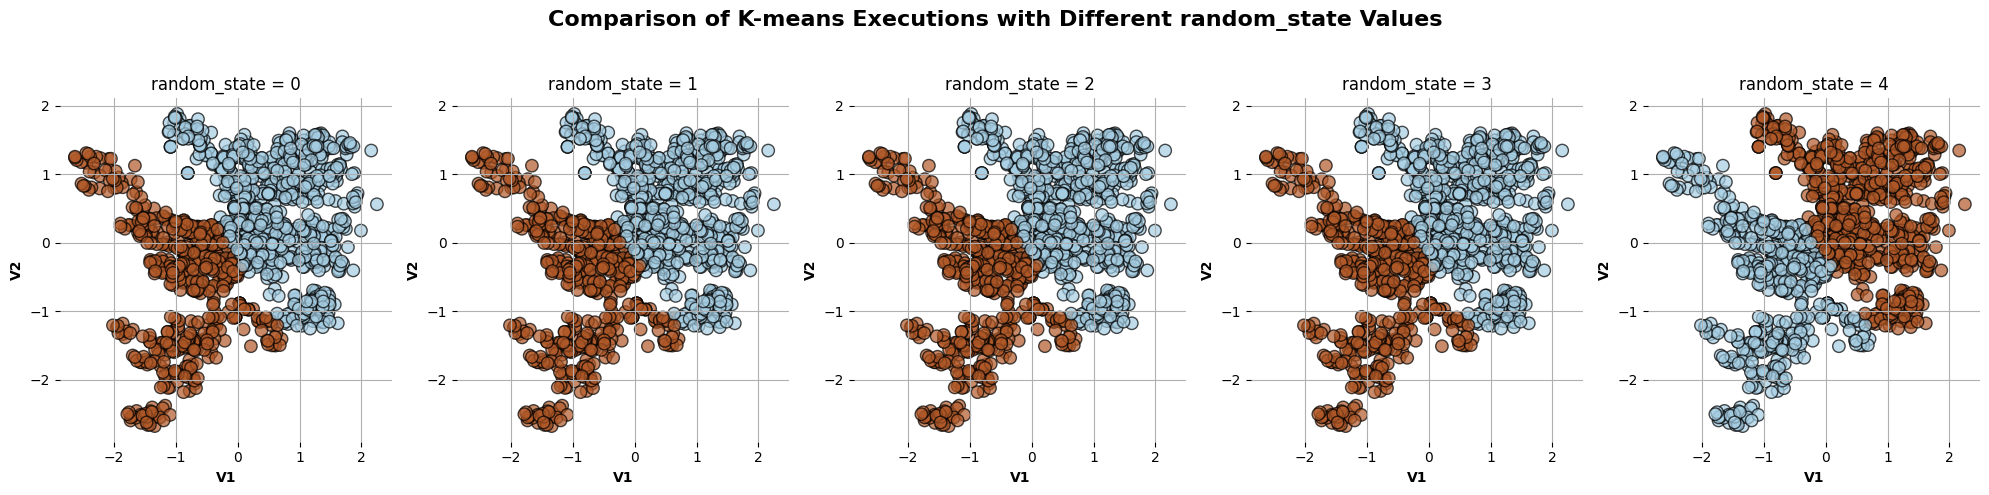

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, seed in enumerate(range(5)):
    kmeans = KMeans(n_clusters=2, random_state=seed)
    df_banknote_scaled['cluster'] = kmeans.fit_predict(df_banknote_scaled[['V1', 'V2']])
    
    axes[i].scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], 
                    c=df_banknote_scaled['cluster'], cmap='Paired', 
                    s=80, edgecolors='k', alpha=0.7)
    axes[i].set_title(f"random_state = {seed}")
    axes[i].set_xlabel("V1", fontweight='semibold')
    axes[i].set_ylabel("V2", fontweight='semibold')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].grid(True)

plt.suptitle("Comparison of K-means Executions with Different random_state Values", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


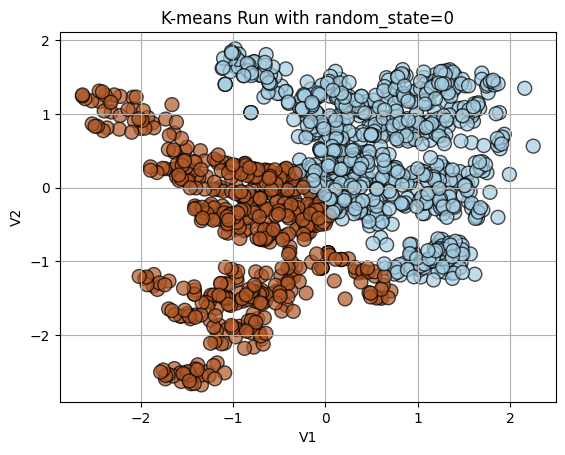

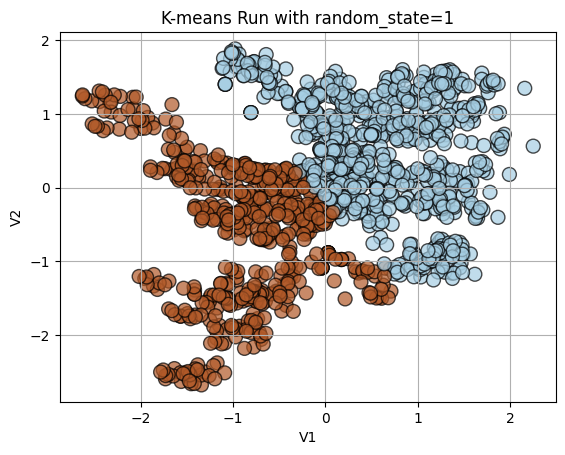

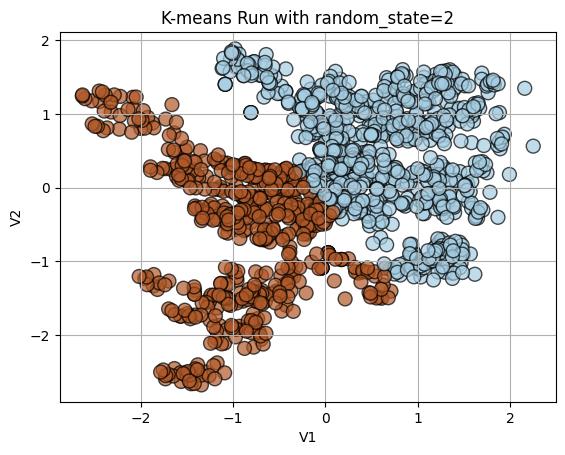

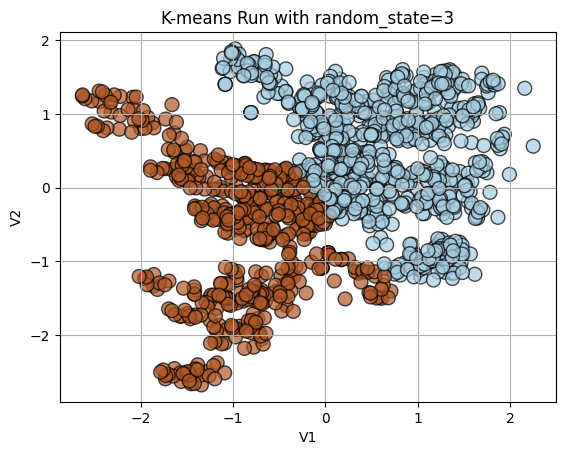

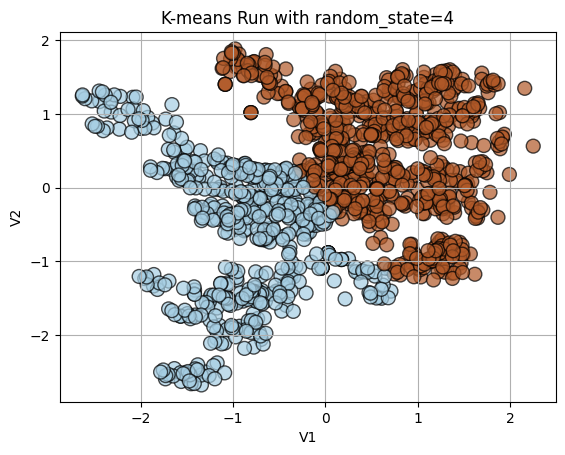

In [56]:
for seed in range(5):
    kmeans = KMeans(n_clusters=2, random_state=seed)
    df_banknote_scaled['cluster'] = kmeans.fit_predict(df_banknote_scaled[['V1', 'V2']])
    
    plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], c=df_banknote_scaled['cluster'], cmap='Paired', s=100, edgecolors='k', alpha=0.7)
    plt.title(f"K-means Run with random_state={seed}")
    plt.xlabel("V1")
    plt.ylabel("V2")
    plt.grid(True)
    plt.show()
